In [1]:
#!/usr/bin/env python3

import pandas as pd
import seaborn as sns

In [2]:
r25_path = "..//data//route25_potential_and_real_stops.csv"
ridership = "..//data//Stop_Riders_Ranking_by_Route_Daily_Totals_May_2019.csv"

In [3]:
r25_stop_ids = pd.read_csv(r25_path, usecols=['Est_TotPop','CorrespondingStopID', 'Transfer'])
r25_stop_ids.dropna(inplace=True)

In [4]:
ridership_data = pd.read_csv(ridership, usecols=['UNIQUE_STOP_NUMBER', 'TOTAL', 'IndividRoute'])

In [5]:
ridership_data = ridership_data[ridership_data['IndividRoute'] == 25]
ridership_data.rename(columns={'UNIQUE_STOP_NUMBER' : 'CorrespondingStopID'}, inplace=True)

In [6]:
final_data = pd.merge(r25_stop_ids, ridership_data, on='CorrespondingStopID', how='inner')
final_data['TOTAL'] = final_data['TOTAL'].astype(int)

In [8]:
final_data
non_transfer = final_data[final_data['Transfer'] == 'No']

In [11]:
non_transfer

,Est_TotPop,Transfer,CorrespondingStopID,TOTAL,IndividRoute
4,612,No,1796.0,4,25
5,525,No,1797.0,7,25
6,502,No,3808.0,6,25
7,412,No,3645.0,3,25
8,274,No,229.0,14,25
9,310,No,2114.0,22,25
10,399,No,194.0,40,25
11,447,No,1887.0,3,25
12,352,No,1888.0,1,25
13,336,No,1889.0,1,25


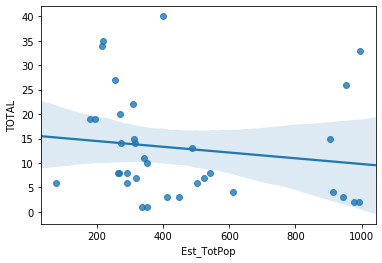

In [14]:
plt = sns.regplot(x=non_transfer['Est_TotPop'], y=non_transfer['TOTAL'])

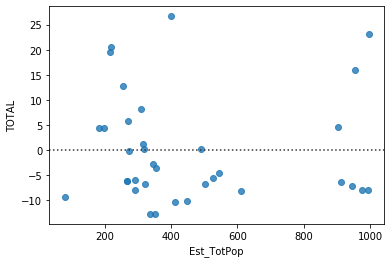

In [12]:
plt2 = sns.residplot(x=non_transfer['Est_TotPop'], y=non_transfer['TOTAL'])

In [15]:
fig = plt.get_figure()
fig.savefig('..//plots//linear_pop_v_util_no_transfer.png')